## CNN to classify CIFAR-10 images

In [4]:
import os
os.chdir("C:/Users/Mounika/Documents/monica work/INSOFE/ai and ds/CNN/cnn/cnn/cifar_cnn")

In [5]:
#Loading train and test data

import numpy as np

train = np.load('cifar_train.npz')
print(train.keys())
train_data = train['data']
train_labels = train['labels']
print('Shape of train data',train_data.shape)
print('Shape of train labels',train_labels.shape)

test  = np.load('cifar_test.npz')
print(test.keys())
test_data = test['data']
test_labels = test['labels']
print('Shape of test data',test_data.shape)
print('Shape of test labels',test_labels.shape)


['data', 'labels']
Shape of train data (50000, 32, 32, 3)
Shape of train labels (50000, 1)
['data', 'labels']
Shape of test data (10000, 32, 32, 3)
Shape of test labels (10000, 1)


In [8]:
(test_labels)

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

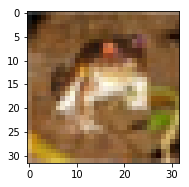

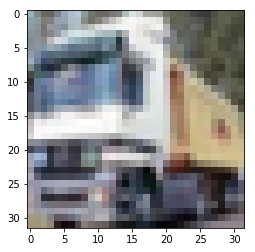

In [69]:
#Visualising train images

import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(train_data[0])
plt.show()
plt.imshow(train_data[1])
plt.show()


### Training a CNN for classification

In [70]:
#Finding the number of classes of target variable
nb_classes = len(np.unique(train_labels))

#Converting class vectors to binary class matrices


from keras.utils import to_categorical

train_labels = to_categorical(train_labels,nb_classes)
test_labels  = to_categorical(test_labels,nb_classes)


In [71]:
#Importing libraries to build convolutional neural network.

from keras import Sequential
from keras.layers import Convolution2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten

In [72]:
img_rows,img_cols=32,32
img_channels=3
model = Sequential()
model.add(Convolution2D(filters=32,kernel_size = (3,3),strides = 1,padding = 'same',activation = 'relu',
                       input_shape=(img_rows,img_cols,img_channels)))
model.add(Convolution2D(filters = 32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64,kernel_size = (3,3),strides = 1,padding = 'same',activation = 'relu'))
model.add(Convolution2D(filters = 64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))


In [73]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [74]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /=255
test_data /= 255


In [75]:
batch_size = 32
nb_epoch = 25

In [77]:
model.fit(train_data[:5000],train_labels[:5000],
         batch_size = batch_size,epochs = nb_epoch,
         validation_data=(test_data[:5000],test_labels[:5000]),
         shuffle = True)

Train on 5000 samples, validate on 5000 samples
Epoch 1/25
5000/5000 [==============================] - 100s 20ms/step - loss: 2.0856 - acc: 0.2262 - val_loss: 1.7923 - val_acc: 0.3750
Epoch 2/25
5000/5000 [==============================] - 92s 18ms/step - loss: 1.7238 - acc: 0.3684 - val_loss: 1.5689 - val_acc: 0.4474
Epoch 3/25
5000/5000 [==============================] - 93s 19ms/step - loss: 1.5414 - acc: 0.4458 - val_loss: 1.4729 - val_acc: 0.4718
Epoch 4/25
5000/5000 [==============================] - 93s 19ms/step - loss: 1.4266 - acc: 0.4876 - val_loss: 1.4447 - val_acc: 0.4918
Epoch 5/25
5000/5000 [==============================] - 94s 19ms/step - loss: 1.3240 - acc: 0.5256 - val_loss: 1.4383 - val_acc: 0.4900
Epoch 6/25
5000/5000 [==============================] - 95s 19ms/step - loss: 1.2258 - acc: 0.5644 - val_loss: 1.2954 - val_acc: 0.5350
Epoch 7/25
5000/5000 [==============================] - 93s 19ms/step - loss: 1.1342 - acc: 0.5944 - val_loss: 1.2747 - val_acc: 0.5496

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
__________